# Identification of top‑K nodes in large networks using Katz centrality

Grupa: Ivan Bukač, Marko Jurić, Josip Mikulić, Mihael Miličević

Učitavanje podataka:

In [57]:
import networkx as nx
import numpy as np
import sys
import pandas as pd
import matplotlib.pyplot as plt
from random import random

np.set_printoptions(threshold=sys.maxsize)
np.set_printoptions(linewidth=1000)
np.set_printoptions(suppress=True)

def calculate_largest_eigenvalue(A):
    x = np.ones(len(A))
    y = x / np.linalg.norm(x)
    while True:
        x = np.matmul(A, y)
        Ax = np.matmul(A, x)
        if np.dot(Ax, x) == np.linalg.norm(Ax) * np.linalg.norm(x):
            return np.linalg.norm(Ax) / np.linalg.norm(x)
        y = x / np.linalg.norm(x)

g = nx.read_gml("karate.gml", label="id")
is_directed = False
A = nx.to_numpy_array(g)
print(f'A =\n{A}')
sigma = calculate_largest_eigenvalue(A)
dimension = A.shape[0]

beta = 1
alpha = 0.9 * 1 / sigma

print(f'sigma = {sigma}')

A =
[[0. 1. 1. 1. 1. 1. 1. 1. 1. 0. 1. 1. 1. 1. 0. 0. 0. 1. 0. 1. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
 [1. 0. 1. 1. 0. 0. 0. 1. 0. 0. 0. 0. 0. 1. 0. 0. 0. 1. 0. 1. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]
 [1. 1. 0. 1. 0. 0. 0. 1. 1. 1. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 0. 0. 0. 1. 0.]
 [1. 1. 1. 0. 0. 0. 0. 1. 0. 0. 0. 0. 1. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 1. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 1. 0. 0. 0. 1. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 1. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [1. 1. 1. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [1. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 1. 1.]
 [0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0

Računanje Katz broadcast centrality za svaki čvor, korištenjem formule:

$$ \textit{Katz}_{i}^{b} = \beta (I - \alpha A)^{-1} \cdot \textbf{1}

In [58]:
C = np.matmul(beta * np.linalg.inv((np.eye(dimension) - alpha * A)), np.ones(dimension))
print(f'C = {C}')

C = [17.38772132 12.78190755 15.01052887 10.25191206  4.5990019   4.90860886  4.90860886  8.41764867 10.91348921  5.43409533  4.5990019   3.32673989  4.69860066 10.84310839  5.42752727  5.42752727  2.3136921   5.03715229  5.42752727  7.46261201  5.42752727  5.03715229  5.42752727  7.82030577  3.74210928  3.84112791  4.37003097  6.98132121  6.72799737  7.05877856  8.59832946  9.66932663 14.9614458  18.12545434]


Pohranjivanje grafa u vlastitu strukturu podataka:

In [59]:
class Node:
    def __init__(self, i):
        self.index = i
        self.Katz_broadcast = 0
        self.edges = {}
        self.neighbour_centralities = []
    def __repr__(self):
        ret_val = ""
        ret_val += f'index = {self.index}, '
        ret_val += f'Katz_broadcast_centrality = {self.Katz_broadcast}, '
        ret_val += f'neighbours = {list(self.edges.keys())}'
        return ret_val

graph = {}

for index in list(g.nodes):
    graph[index] = Node(index)

for edge in list(g.edges):
    graph[edge[0]].edges[edge[1]] = graph[edge[1]]
    if not is_directed:
        graph[edge[1]].edges[edge[0]] = graph[edge[0]]

for i in range(len(C)):
    graph[i+1].Katz_broadcast = C[i]

nodes = [graph[i] for i in graph]
nodes.sort(key = lambda x: x.Katz_broadcast)
nodes.reverse()

Računanje centraliteta svih susjeda, za svaki čvor:

In [60]:
for node in nodes:
    for edge in node.edges:
        node.neighbour_centralities.append(node.edges[edge].Katz_broadcast)

Računanje top-K čvorova:

In [61]:
filtering_constant = 5

global_average_centrality = 0
for node in nodes:
    global_average_centrality += node.Katz_broadcast
global_average_centrality = global_average_centrality / len(nodes)

print(f'global average centrality = {global_average_centrality}')
print(f'filtering constant = {filtering_constant}')
print('-' * 100)

K_nodes = []

for node in nodes:
    if node.Katz_broadcast >= filtering_constant:
        local_average_centrality = node.Katz_broadcast
        for el in node.neighbour_centralities:
            local_average_centrality += el
        local_average_centrality = local_average_centrality / (len(node.neighbour_centralities) + 1)
        print(f'node {node.index}: Katz broadcast centrality = {node.Katz_broadcast}, local average centrality = {local_average_centrality}')
        if local_average_centrality >= global_average_centrality:
            K_nodes.append(node)
    else:
        print(f'node {node.index}: Katz broadcast centrality = {node.Katz_broadcast}')

global average centrality = 7.557807230213879
filtering constant = 5
----------------------------------------------------------------------------------------------------
node 34: Katz broadcast centrality = 18.125454344367974, local average centrality = 8.116885078920236
node 1: Katz broadcast centrality = 17.387721317973334, local average centrality = 8.226654197093552
node 3: Katz broadcast centrality = 15.010528873686486, local average centrality = 10.882834161110083
node 33: Katz broadcast centrality = 14.961445801738154, local average centrality = 9.176561155963098
node 2: Katz broadcast centrality = 12.781907548614072, local average centrality = 10.082807291181501
node 9: Katz broadcast centrality = 10.913489205395027, local average centrality = 14.166161501200477
node 14: Katz broadcast centrality = 10.843108389728648, local average centrality = 14.066772088960482
node 4: Katz broadcast centrality = 10.251912059392385, local average centrality = 11.34163250278685
node 32: Katz b

Ispis top-K čvorova:

In [62]:
for node in K_nodes:
    print(node)

index = 34, Katz_broadcast_centrality = 18.125454344367974, neighbours = [9, 10, 14, 15, 16, 19, 20, 21, 23, 24, 27, 28, 29, 30, 31, 32, 33]
index = 1, Katz_broadcast_centrality = 17.387721317973334, neighbours = [2, 3, 4, 5, 6, 7, 8, 9, 11, 12, 13, 14, 18, 20, 22, 32]
index = 3, Katz_broadcast_centrality = 15.010528873686486, neighbours = [1, 2, 4, 8, 9, 10, 14, 28, 29, 33]
index = 33, Katz_broadcast_centrality = 14.961445801738154, neighbours = [3, 9, 15, 16, 19, 21, 23, 24, 30, 31, 32, 34]
index = 2, Katz_broadcast_centrality = 12.781907548614072, neighbours = [1, 3, 4, 8, 14, 18, 20, 22, 31]
index = 9, Katz_broadcast_centrality = 10.913489205395027, neighbours = [1, 3, 31, 33, 34]
index = 14, Katz_broadcast_centrality = 10.843108389728648, neighbours = [1, 2, 3, 4, 34]
index = 4, Katz_broadcast_centrality = 10.251912059392385, neighbours = [1, 2, 3, 8, 13, 14]
index = 32, Katz_broadcast_centrality = 9.669326630419011, neighbours = [1, 25, 26, 29, 33, 34]
index = 31, Katz_broadcast_

Prikaz top-K čvorova:

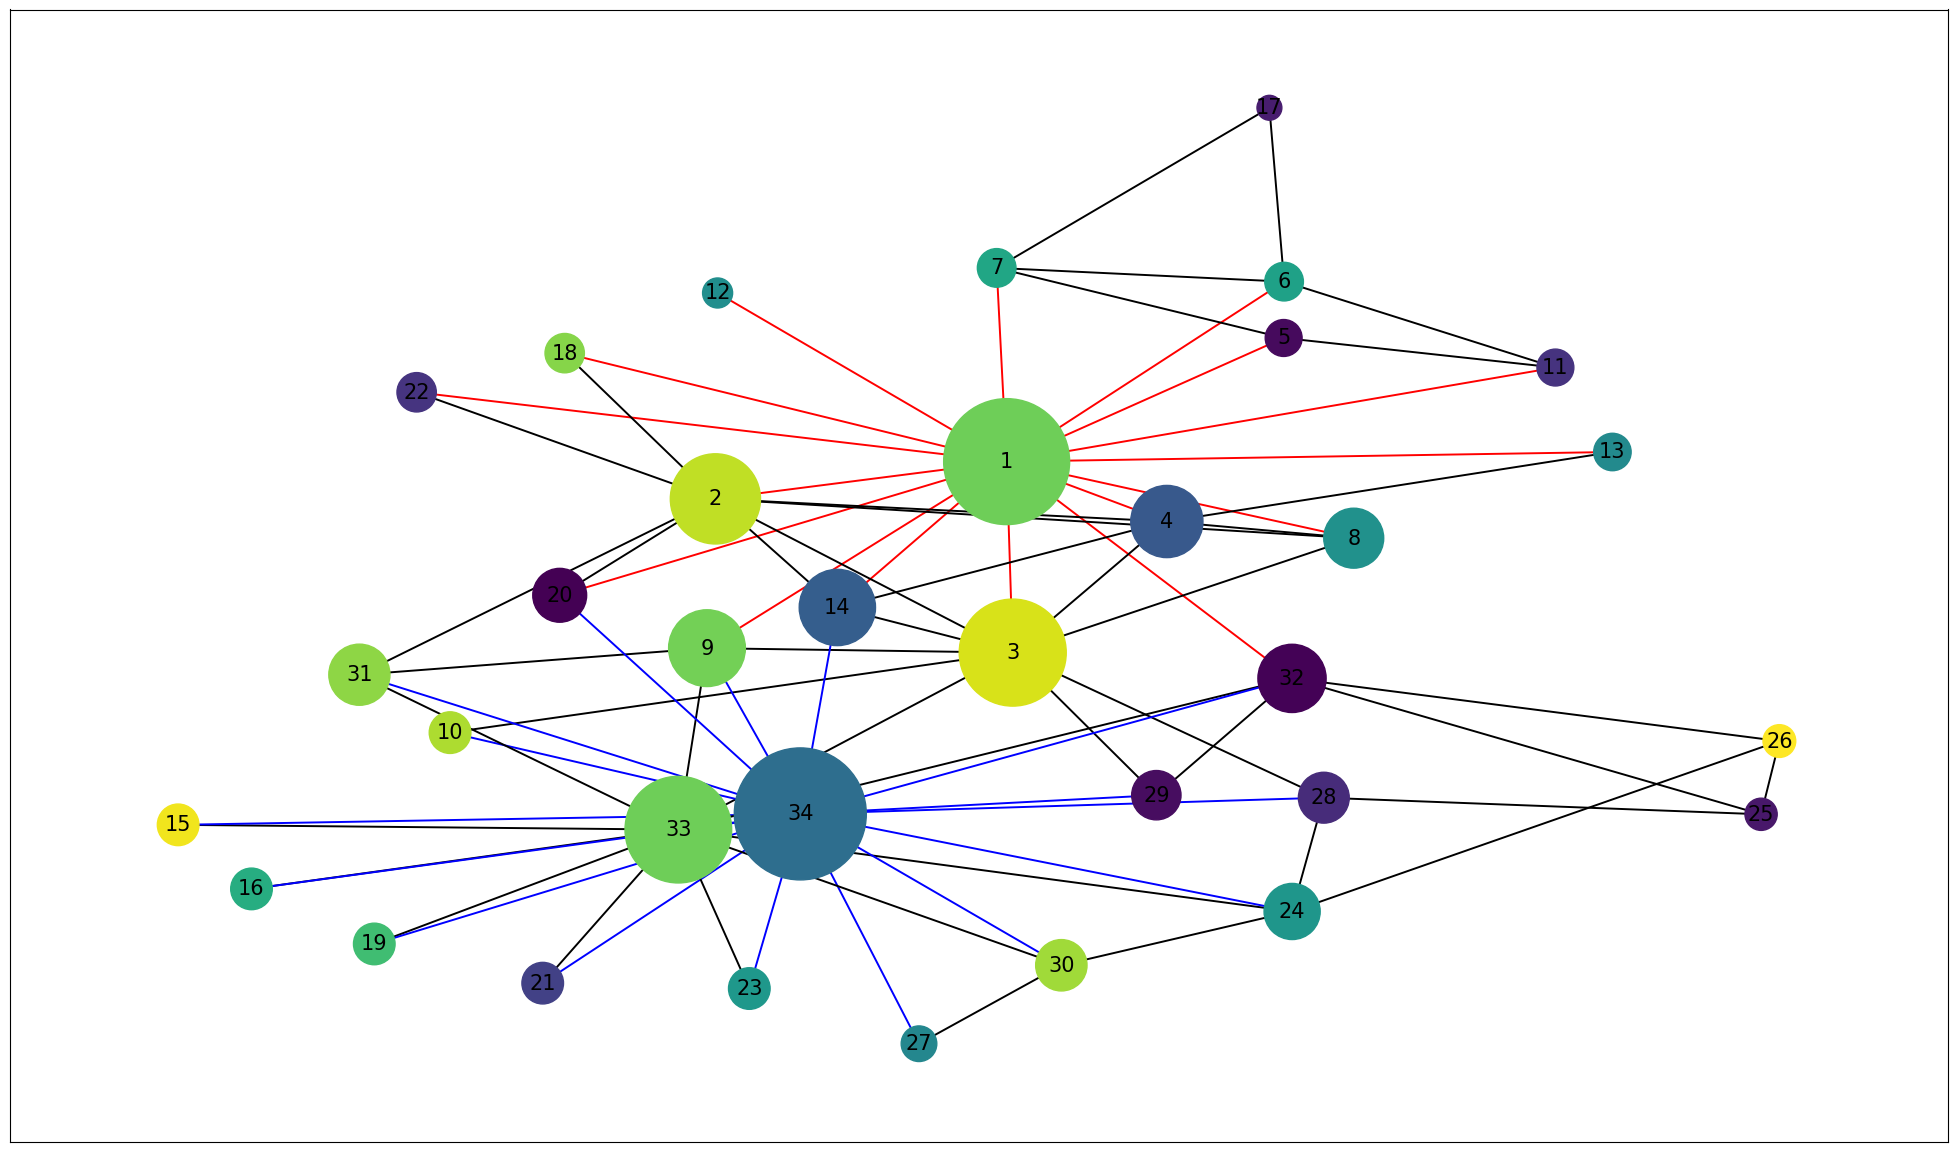

In [63]:
nodes = [graph[i] for i in graph]
fig = plt.figure(1, figsize=(25, 15), dpi=100)

df = pd.DataFrame(index=g.nodes(), columns=g.nodes())
for row, data in nx.shortest_path_length(g):
    for col, dist in data.items():
        df.loc[row,col] = dist / 2

df = df.fillna(df.max().max())
df[33][32] = 24
df[32][33] = 24

edge_color = []
for src_dst in g.edges:
    if src_dst[0] == 34 or src_dst[1] == 34:
        edge_color.append("b")
    elif src_dst[0] == 1 or src_dst[1] == 1:
        edge_color.append("r")
    else:
        edge_color.append("k")

layout = nx.kamada_kawai_layout(g, dist=df.to_dict())

node_color = []
for i in range(len(g.nodes)):
    node_color.append(random())

nx.draw_networkx(g,width = 1.4, edge_color = edge_color , node_color = node_color ,pos = layout, node_size = [pow(node.Katz_broadcast + 5, 2.9) for node in nodes], font_size = 15)

Prikaz bridova top-2 čvora:

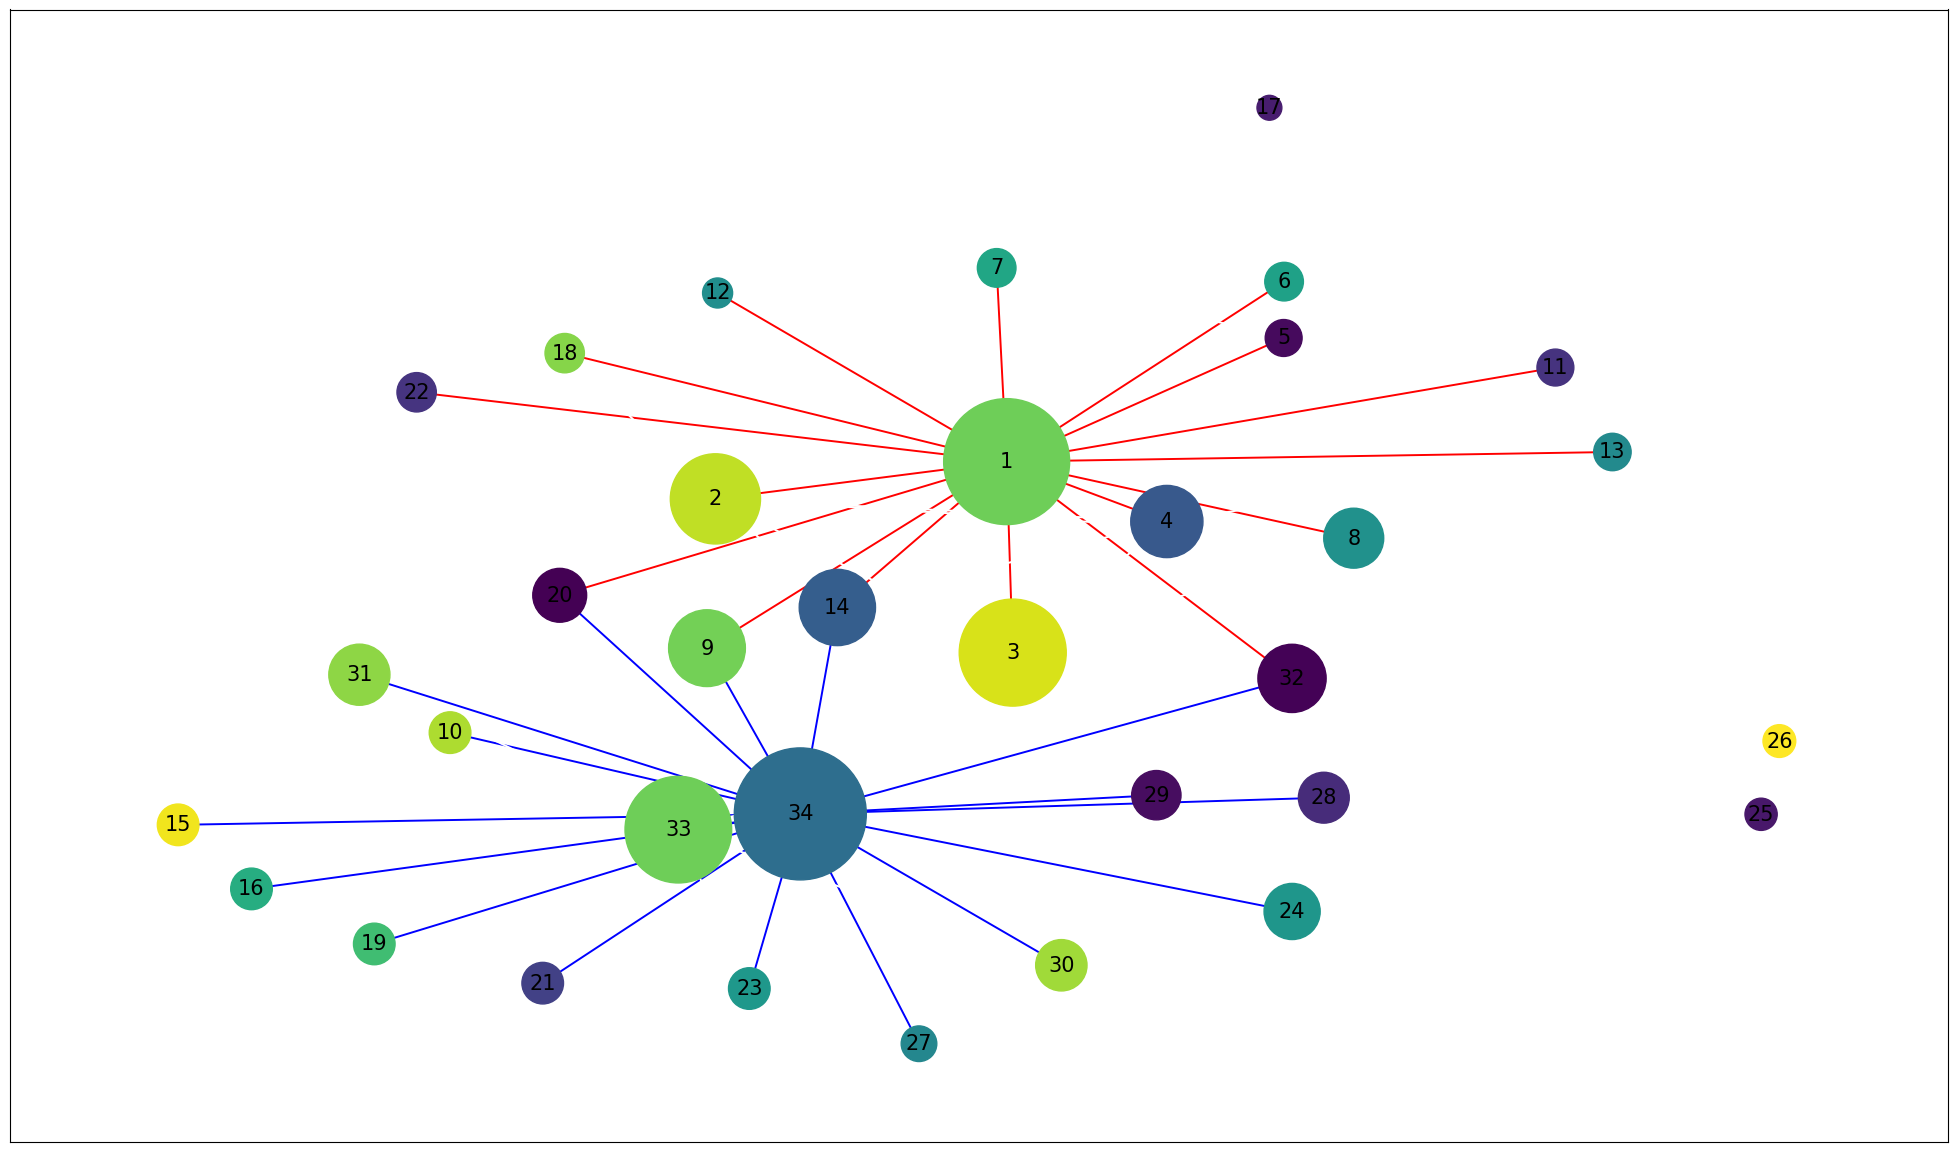

In [64]:
fig = plt.figure(2, figsize=(25, 15), dpi=100)


edge_color = []
for src_dst in g.edges:
    if src_dst[0] == 34 or src_dst[1] == 34:
        edge_color.append("b")
    elif src_dst[0] == 1 or src_dst[1] == 1:
        edge_color.append("r")
    else:
        edge_color.append("w")

layout = nx.kamada_kawai_layout(g, dist=df.to_dict())

nx.draw_networkx(g,width = 1.4, edge_color = edge_color , node_color = node_color ,pos = layout, node_size = [pow(node.Katz_broadcast + 5, 2.9) for node in nodes], font_size = 15)
for src_dst in g.edges:

    if src_dst[0] == K_nodes[0].index or src_dst[1] == K_nodes[0].index:
        edge_color.append("b")
    elif src_dst[0] == K_nodes[1].index or src_dst[1] == K_nodes[1].index:
        edge_color.append("r")
    elif src_dst[0] == K_nodes[2].index or src_dst[1] == K_nodes[2].index:
        edge_color.append("g")
    else:
        edge_color.append("w")